In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
!pip install optuna

In [ ]:
df = pd.read_csv("/content/data_agg.csv", sep = ";")
df.head()

,Открыт_дата,День недели,Месяц,ЗП,Время года,"Сумма по чеку, руб.",Средняя Температура,Снег,Дождь,Праздник_вых,Праздник_раб,Праздники,Предпраздничный
0,2022-09-01,3,9,0,3,96630.0,11.4,0,0,0,0,0,0
1,2022-09-02,4,9,0,3,108024.5,10.5,0,1,0,0,0,0
2,2022-09-03,5,9,0,3,122352.0,12.5,0,0,0,0,0,0
3,2022-09-04,6,9,0,3,119441.7,12.2,0,0,0,0,0,0
4,2022-09-05,0,9,0,3,87863.5,10.3,0,0,0,0,0,0


In [ ]:
df.shape

(420, 13)

In [ ]:
def drop_uninformative(data, threshold = 0.9):

  for column in data.columns:
    max_freq = data[column].value_counts(normalize=True).max()
    if max_freq >= threshold:
      data.drop(column, axis=1, inplace=True)
      print(f"Колонка {column} удалена")


In [ ]:
drop_uninformative(df)

Колонка Праздник_вых удалена
Колонка Праздник_раб удалена
Колонка Праздники удалена
Колонка Предпраздничный удалена


In [ ]:
df.head()

,Открыт_дата,День недели,Месяц,ЗП,Время года,"Сумма по чеку, руб.",Средняя Температура,Снег,Дождь
0,2022-09-01,3,9,0,3,96630.0,11.4,0,0
1,2022-09-02,4,9,0,3,108024.5,10.5,0,1
2,2022-09-03,5,9,0,3,122352.0,12.5,0,0
3,2022-09-04,6,9,0,3,119441.7,12.2,0,0
4,2022-09-05,0,9,0,3,87863.5,10.3,0,0


In [ ]:
df.rename(columns = {
    "Открыт_дата":"time",
    "День недели":"day_of_week",
    "Месяц": "month",
    "ЗП":"salary_week",
    "Время года":"season",
    "Сумма по чеку, руб.":"revenue",
    "Средняя Температура":"avg_temp",
    "Снег":"snow",
    "Дождь":"rain"
}, inplace = True)

In [ ]:
df.head()

,time,day_of_week,month,salary_week,season,revenue,avg_temp,snow,rain
0,2022-09-01,3,9,0,3,96630.0,11.4,0,0
1,2022-09-02,4,9,0,3,108024.5,10.5,0,1
2,2022-09-03,5,9,0,3,122352.0,12.5,0,0
3,2022-09-04,6,9,0,3,119441.7,12.2,0,0
4,2022-09-05,0,9,0,3,87863.5,10.3,0,0


In [ ]:
df.to_csv("final_data_agg.csv", sep = ";")

In [ ]:
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]
train["time"].values[-1], test["time"].values[0]

('2023-08-03', '2023-08-04')

In [ ]:
train.rename(columns = {"time":"ds", "revenue":"y"}, inplace = True)
test.rename(columns = {"time":"ds", "revenue":"y"}, inplace = True)

<ipython-input-18-6dae1d79bd99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rename(columns = {"time":"ds", "revenue":"y"}, inplace = True)
<ipython-input-18-6dae1d79bd99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.rename(columns = {"time":"ds", "revenue":"y"}, inplace = True)


In [ ]:
model = Prophet()

In [ ]:
for column in train.columns:
  if column != "ds" and column != "y":
    model.add_regressor(column)

model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1hzihn3p/43lpyf4d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1hzihn3p/6l59v2se.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18101', 'data', 'file=/tmp/tmp1hzihn3p/43lpyf4d.json', 'init=/tmp/tmp1hzihn3p/6l59v2se.json', 'output', 'file=/tmp/tmp1hzihn3p/prophet_modelonl8_v2i/prophet_model-20231226054351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:43:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:43:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(len(test))
forecast = model.predict(test)


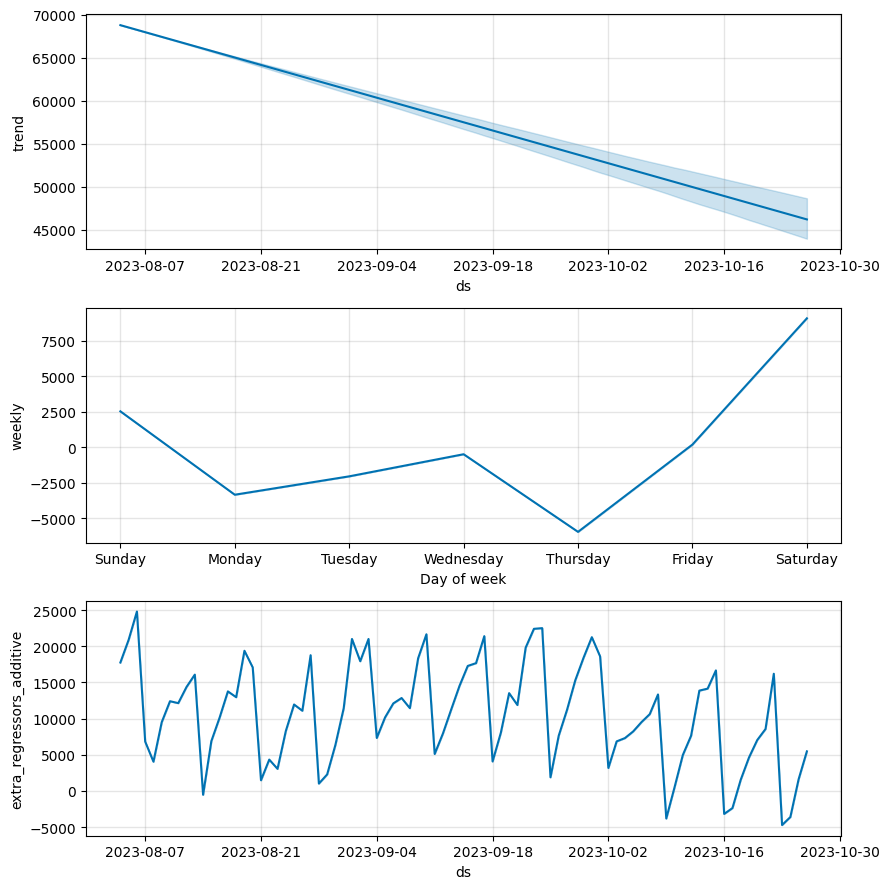

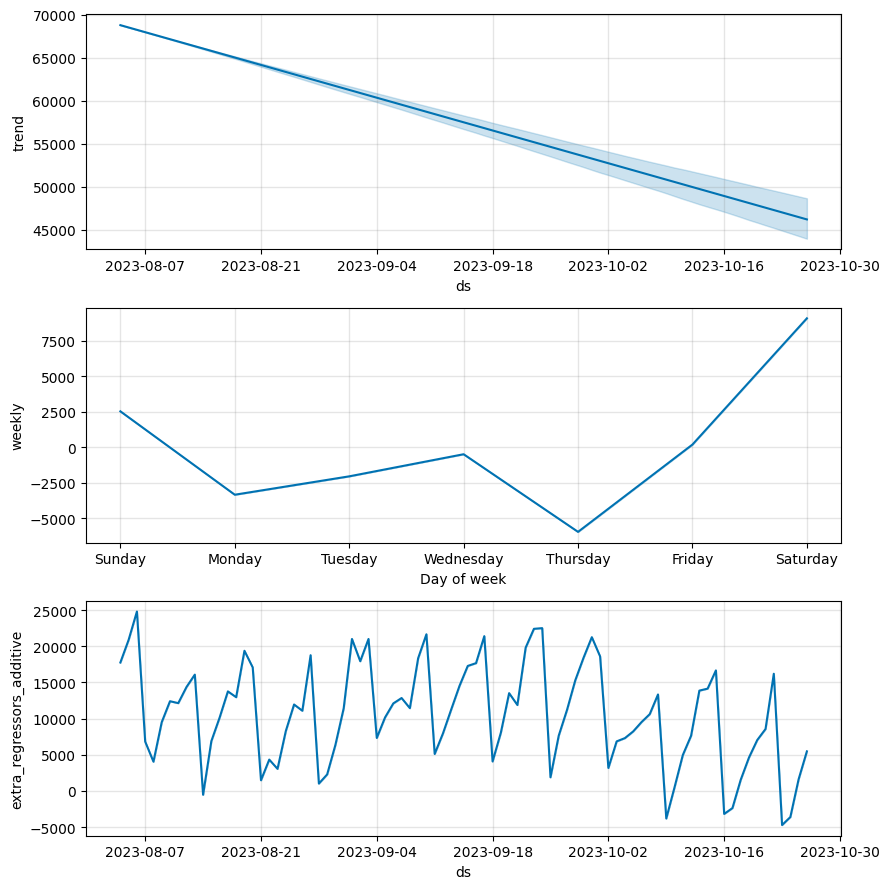

In [ ]:
model.plot_components(forecast)

In [ ]:
def metric(y_pred, model_name):
  print(f"======= Резултаты {model_name} =======")
  print()
  print("RMSE = ", round(np.sqrt(mean_squared_error(test['y'], y_pred)), 3))
  print("MAE = ", round(mean_absolute_error(test['y'], y_pred),3))
  print("MAPE = ", round(mean_absolute_percentage_error(test['y'], y_pred),3))
  print()

def pred_plot(y_pred, model_name):
  plt.figure(figsize=(16, 10))
  plt.plot(train['ds'], train['y'], label='Обучающий набор (фактический)', color = "green")
  plt.plot(test['ds'], test['y'], label='Тестовый набор (фактический)', color='blue')
  plt.plot(test['ds'], y_pred, label=model_name, color = "black")
  plt.xlabel('Дата')
  plt.ylabel('Значения')
  plt.title('Сравнение фактических и предсказанных данных')
  plt.legend()
  plt.show()

======= Резултаты Prophet =======

RMSE =  30291.605
MAE =  25680.63
MAPE =  0.272



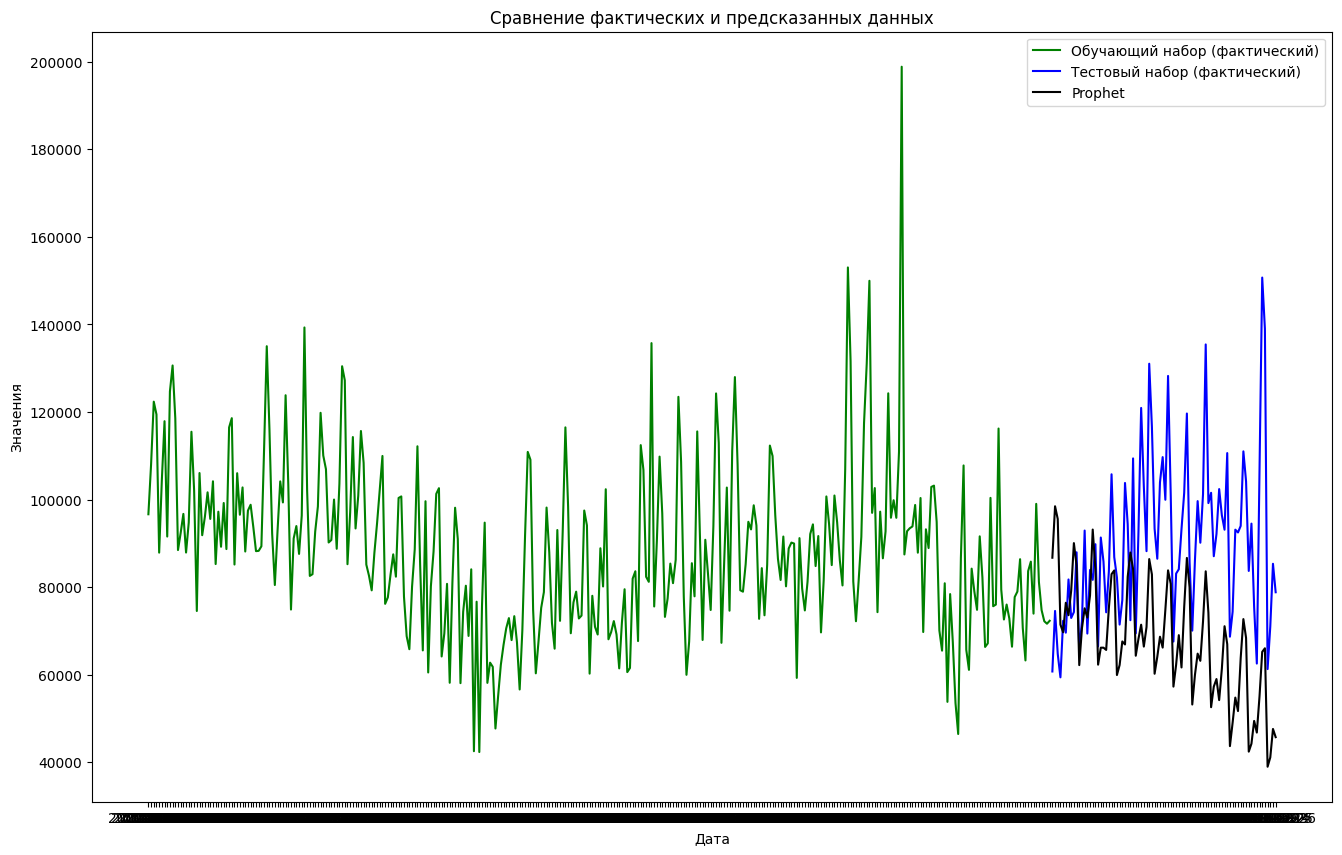

In [ ]:
metric(forecast["yhat"], "Prophet")
pred_plot(forecast["yhat"], "Prophet")

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor()
catboost.fit(train.drop(columns = ["y", "ds"]), train["y"])
predict = catboost.predict(test.drop(columns = ["y", "ds"]))

======= Резултаты CatBoostRegressor =======

RMSE =  14000.435
MAE =  10841.297
MAPE =  0.124



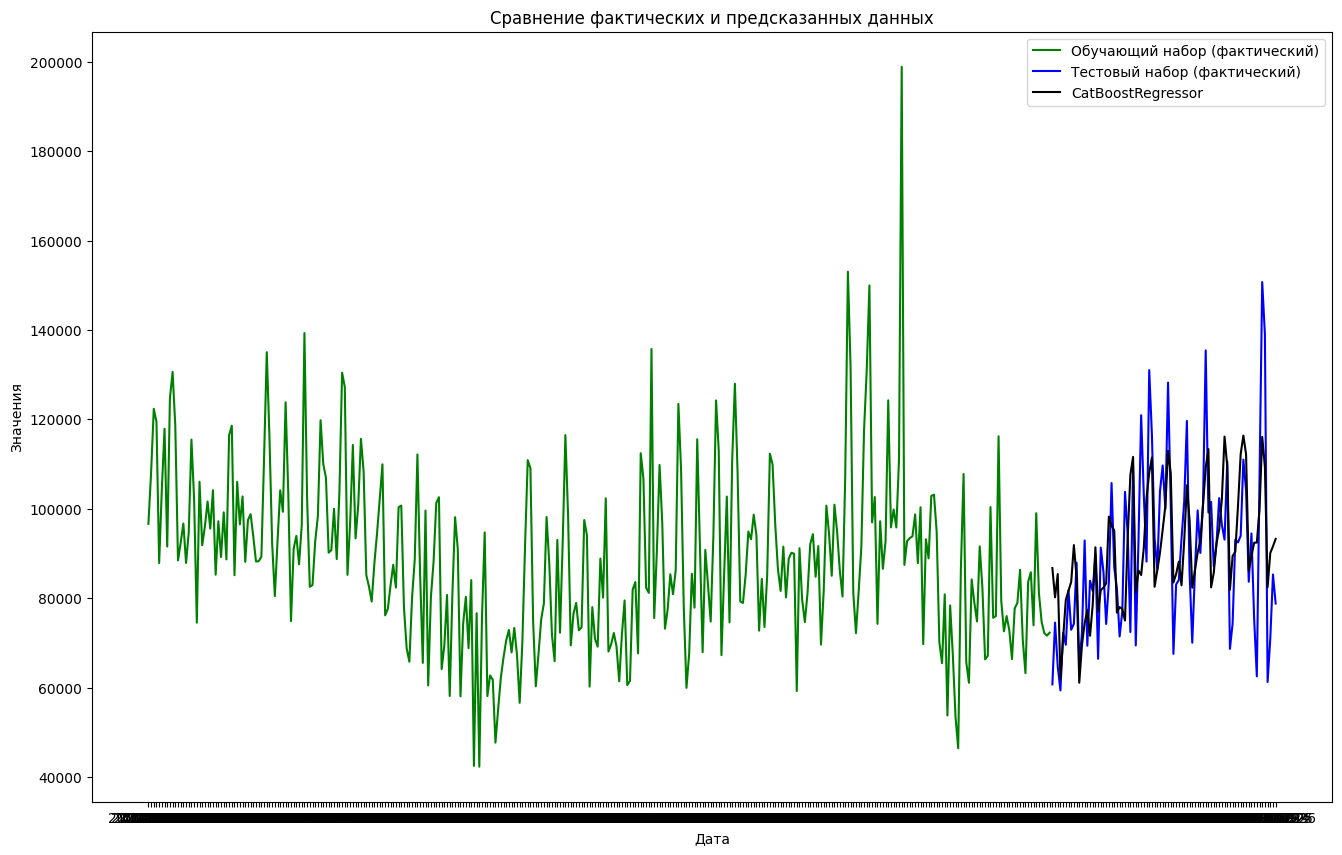

In [ ]:
metric(predict, "CatBoostRegressor")
pred_plot(predict, "CatBoostRegressor")

In [ ]:
from xgboost import XGBRegressor

xgboost = XGBRegressor()
xgboost.fit(train.drop(columns = ["y", "ds"]), train["y"])
xgboost_predict = catboost.predict(test.drop(columns = ["y", "ds"]))

======= Резултаты XGBRegressor =======

RMSE =  14000.435
MAE =  10841.297
MAPE =  0.124



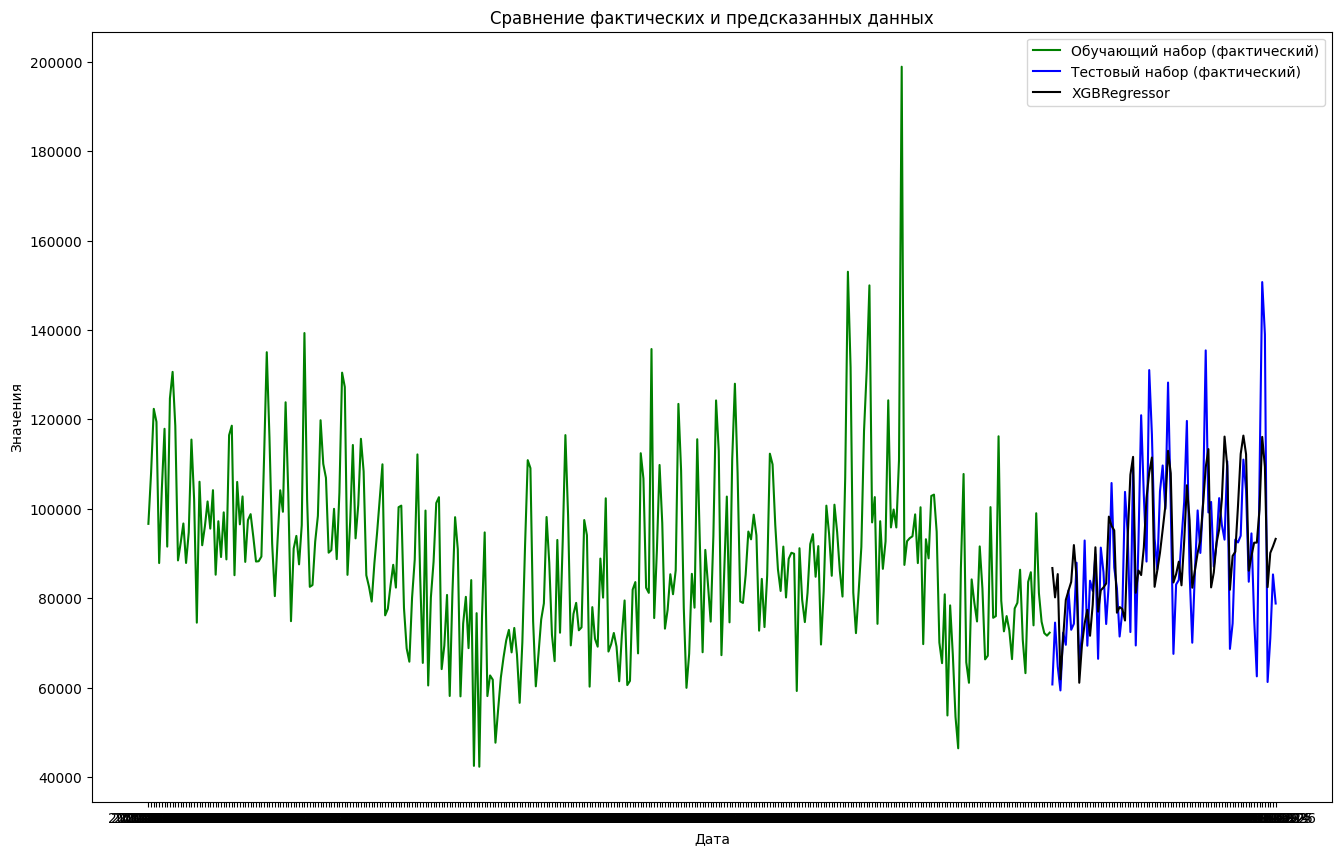

In [ ]:
metric(predict, "XGBRegressor")
pred_plot(predict, "XGBRegressor")